c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


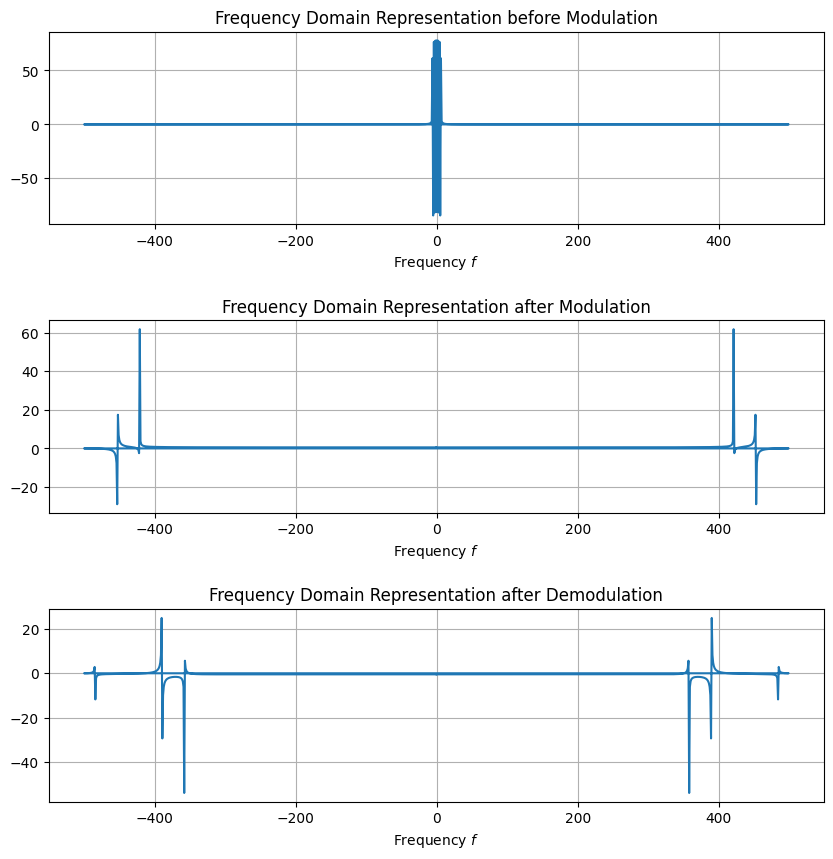

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define the time-domain signal
sampling_rate = 1000  # Sampling rate in Hz (samples per second)
t = np.linspace(0, 1, sampling_rate)  # Time vector (1 second of data)
f1,f2 = 200, 800  # Frequencies in Hz
w1,w2 = 2*np.pi*f1,2*np.pi*f2


fig,ax = plt.subplots(3,1,figsize= (10,10))

#Generating the signal
x = sp.symbols("x")
f = sp.Piecewise((x,(-np.pi<=x ) &(x<=np.pi) ),(0,True))
f_numeric = sp.lambdify(x,f,"numpy")
t = np.linspace(-2*np.pi,2*np.pi,1000)

# Signal modulation
signal = np.sinc(t)
mod_signal = np.cos(w1*t)*(np.cos(w2*t))
demod_signal = np.cos(w1*t)*(np.cos(w2*t))*(np.cos(w2*t))

# Perform the FFT
n = len(signal)  # Length of the signal
fft_signal = np.fft.fft(signal)  # Compute the FFT
fft_mod_signal = np.fft.fft(mod_signal)  # Compute the FFT
fft_demod_signal = np.fft.fft(demod_signal)  # Compute the FFT



fft_freq = np.fft.fftfreq(n, d=1/sampling_rate)  # Frequency axis

# Plot the frequency domain representation (magnitude of FFT with negative and positive frequencies)
ax[0].plot(fft_freq,(fft_signal))
ax[0].set_title('Frequency Domain Representation before Modulation')
ax[1].plot(fft_freq,(fft_mod_signal))
ax[1].set_title('Frequency Domain Representation after Modulation')
ax[2].plot(fft_freq,(fft_demod_signal))
ax[2].set_title('Frequency Domain Representation after Demodulation')

for i in range(3):
    ax[i].set_xlabel("Frequency $f$")
    ax[i].grid(True)

plt.subplots_adjust(hspace=0.5)



